# Fuel Economy Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")

In [2]:
autoData = pd.read_csv("./data/autoData.csv")
hp = autoData.hp
mpg = autoData.mpg
wt = autoData.wt

In [3]:
nan_idx = mpg.isna()
mpg = mpg[~nan_idx]
hp = hp[~nan_idx]
wt = wt[~nan_idx]

Fuel economy in the U.S. is typically given in miles/gallon. In many countries, however, the standard units are liters/100km. Given mpg, you can calculate economy in L/100km by dividing 235.214583 by mpg.

In [4]:
fuel_economy = 235.214583 / mpg
numerical_data = pd.concat([wt, hp, fuel_economy], axis=1)
numerical_data.head()

,wt,hp,mpg
0,1915,80,6.588644
1,1963,67,9.046715
2,1980,74,6.533738
3,1995,67,6.189857
4,2003,61,7.350456


<Figure size 640x480 with 0 Axes>

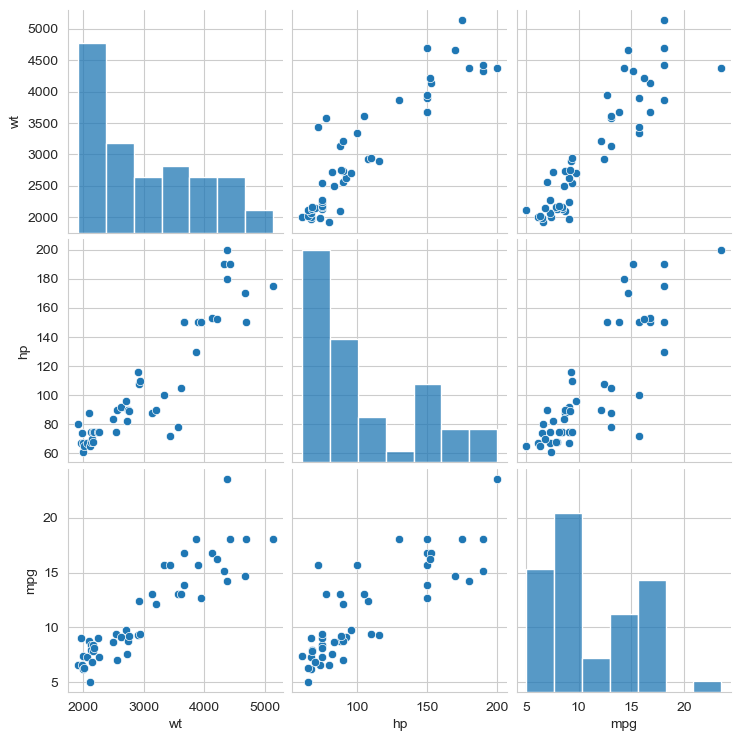

In [5]:
plt.figure()
sns.pairplot(numerical_data)
plt.show()

In [6]:
numerical_data.corr()

,wt,hp,mpg
wt,1.000000,0.906030,0.907034
hp,0.906030,1.000000,0.834714
mpg,0.907034,0.834714,1.000000


In [7]:
p = np.polyfit(wt, fuel_economy, 1)
p

array([ 0.00421378, -1.44433078])

In [8]:
fuel_economy_fitted = np.polyval(p, wt)

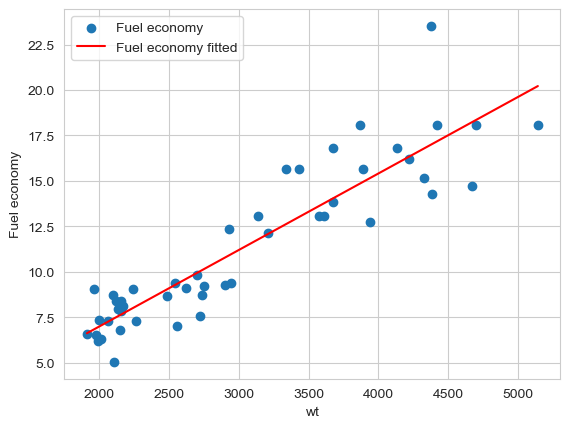

In [9]:
plt.figure()
plt.scatter(wt, fuel_economy)
plt.plot(wt, fuel_economy_fitted, color='r')
plt.xlabel("wt")
plt.ylabel("Fuel economy")
plt.legend(["Fuel economy", "Fuel economy fitted"])
plt.show()